## Exercise 2: Using Patient Data to Predict Heart Disease

### **Context:**
Heart disease remains one of the leading causes of mortality worldwide, making it a critical area of medical research. The "Heart Disease UCI" dataset on Kaggle contains multiple attributes that can be used to predict the presence of heart disease in individuals.

### **Main Question:**
Can we predict the presence of heart disease based on a combination of medical, lifestyle, and demographic factors?

## **Objectives for Each Step**

### **Step 1: Data Access**
- Download the "Heart Disease UCI" dataset from Kaggle.

### **Step 2: Data Import**
- Load the dataset using Python and Pandas for analysis.

### **Step 3: Exploratory Data Analysis (EDA)**
- Visualize data to identify patterns and outliers.
- Compute summary statistics for insights into the dataset's structure.

### **Step 4: Data Preprocessing**
- Handle missing values and outliers.
- Encode categorical variables.
- Normalize/standardize numerical variables.

### **Step 5: Data Splitting**
- Divide the dataset into training and testing subsets.

### **Step 6: Model Training**
- Train a logistic regression model to predict heart disease.

### **Step 7: Model Evaluation**
- Use accuracy, precision, recall, F1-score, and the ROC curve to evaluate performance.

### **Step 8: Interpretation of Results**
- Analyze the impact of different predictors.
- Assess sensitivity and specificity using the ROC curve.

### **Step 9: Reflection**
- Discuss real-world applications in medical diagnostics and preventive healthcare.

### **Step 1: Data Access**


In [27]:
# Step 1: Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc


### **Step 2: Data Import**
- Load the dataset using Python and Pandas for analysis.

In [53]:
# Step 2: Load the dataset
data = pd.read_csv("./heart_disease_uci.csv")

# Rename the target column 
data.rename(columns={'num': 'target'}, inplace=True)



### **Step 3: Exploratory Data Analysis (EDA)**  

In this step, we analyze the dataset to understand its structure, distribution, and potential patterns. The key objectives are:  

- **Preview the dataset:** Using `head()`, we display the first few rows to check the data format and feature values.  
- **Understand data types and missing values:** `info()` helps identify categorical vs. numerical features and detect missing values.  
- **Summarize numerical features:** `describe()` provides statistical insights, such as mean, standard deviation, and percentiles.  
- **Visualize class distribution:** A count plot (`sns.countplot`) shows how many patients have heart disease (`target=1`) vs. those without (`target=0`). This helps us understand the balance of the dataset, which is crucial for model performance.  

By conducting EDA, we gain insights that guide data preprocessing and feature selection for the model.  


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  target  
0       fixed defect       0  
1             normal       2  
2  reversable defect       1  
3             normal       0  
4             normal 

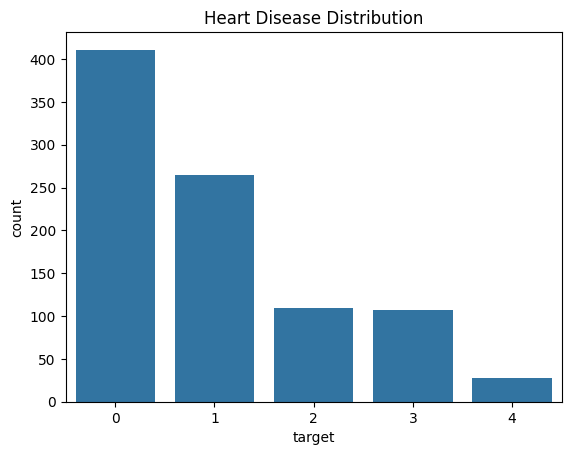

In [29]:
# Step 3: Exploratory Data Analysis
print(data.head())
print(data.info())
print(data.describe())
# Visualize class distribution
sns.countplot(x='target', data=data)
plt.title("Heart Disease Distribution")
plt.show()

### **Step 4: Data Preprocessing**  

Before training our model, we need to clean and transform the data to ensure it is in the correct format. This step includes:  

- **Encoding Categorical Variables:**  
  - The dataset contains categorical features (`sex`, `cp`, `restecg`, `slope`, `thal`, `dataset`) that need to be converted into numerical format.  
  - We use `LabelEncoder()` to transform these categorical values into numbers.  

- **Handling Missing Values:**  
  - If any numerical columns have missing values, we replace them with the **median** of that column to avoid data loss.  

- **Normalizing Numerical Variables:**  
  - Features like `age`, `trestbps` (blood pressure), `chol` (cholesterol), `thalch` (max heart rate), `oldpeak`, and `ca` (number of major vessels) may have different scales.  
  - To ensure fair weighting in our model, we **standardize** these numerical columns using `StandardScaler()`, which transforms them to have a mean of 0 and a standard deviation of 1.  

These preprocessing steps improve model performance and ensure compatibility with the logistic regression algorithm.  


In [42]:
# Step 4: Data Preprocessing
# Handling categorical variables 
le = LabelEncoder()
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal', 'dataset']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Handle missing values (fill with median or mean)
data.fillna(data.median(numeric_only=True), inplace=True)

# Normalizing numerical variables
scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])









### **Step 5: Data Splitting**
- Divide the dataset into training and testing subsets.

In [48]:
# Step 5: Splitting Data
# Ensure 'target' column is binary (0 or 1)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Converts multi-class labels to binary

X = data.drop(columns=['target', 'id'])  # Dropping 'id' as it's not useful
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step: Check the types of X_train and y_train
print("X_train types:")
print(X_train.dtypes)

print("y_train types:")
print(y_train.dtypes)


X_train types:
age           float64
sex             int32
dataset         int32
cp              int32
trestbps      float64
chol          float64
restecg         int32
thalch        float64
oldpeak       float64
slope           int32
ca            float64
thal            int32
fbs_True         bool
exang_True       bool
dtype: object
y_train types:
int64


### **Step 6: Model Training**
- Train a logistic regression model to predict heart disease.

In [49]:
# Step 6: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### **Step 7: Model Evaluation**  

After training our logistic regression model, we need to assess its performance on the test dataset. This step includes:  

- **Making Predictions:**  
  - The trained model is used to predict the target variable (`heart disease presence`) for the test set (`X_test`).  

- **Evaluating Model Accuracy:**  
  - `accuracy_score(y_test, predictions)` calculates the overall proportion of correct predictions.  
  - Accuracy provides a general measure of performance but may not be sufficient for imbalanced datasets.  

- **Generating a Classification Report:**  
  - `classification_report(y_test, predictions)` provides detailed metrics, including:  
    - **Precision:** The proportion of positive predictions that are actually correct (true positives / all predicted positives).  
    - **Recall (Sensitivity):** The proportion of actual positives that were correctly identified.  
    - **F1-Score:** A balance between precision and recall, useful when the dataset is imbalanced.  
    - **Support:** The number of actual occurrences of each class in the test set.  




Accuracy: 0.7934782608695652
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        75
           1       0.86      0.78      0.82       109

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



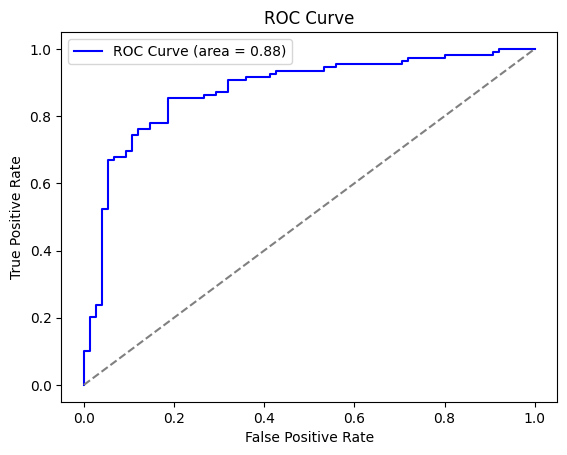

In [52]:
# Step 7: Model Evaluation
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
# ROC Curve
# Ensure 'target' column is binary (0 or 1)


fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## **Step 8: Interpretation of Results**  

### **Model Performance Summary**  
The logistic regression model achieved an **accuracy of 79.3%**, meaning it correctly predicts heart disease in approximately **8 out of 10 cases**.  

#### **Class-wise Performance:**  
- **Class 0 (No Heart Disease)**  
  - **Precision:** 72% (When the model predicts "No Heart Disease," it's correct 72% of the time.)  
  - **Recall:** 81% (81% of healthy individuals are correctly classified.)  
  - **Observation:** The model performs well in identifying healthy individuals but has some **false positives**.  

- **Class 1 (Heart Disease Present)**  
  - **Precision:** 86% (When the model predicts "Heart Disease," it's correct 86% of the time.)  
  - **Recall:** 78% (The model correctly detects 78% of actual heart disease cases.)  
  - **Observation:** The model is **strong in identifying heart disease** but may **miss some true cases** (false negatives).  

#### **Key Metrics from the Classification Report:**  
- **Precision (0.86 for Class 1):** The proportion of actual heart disease cases among positive predictions.  
- **Recall (0.78 for Class 1):** The proportion of actual heart disease cases correctly identified.  
- **F1-score (0.82 for Class 1):** A balance between precision and recall, showing overall effectiveness.  

---

### **Assessing Sensitivity and Specificity**  
- **Sensitivity (Recall for Class 1) = 0.78** → The model correctly identifies **78% of people with heart disease**.  
- **Specificity (Recall for Class 0) = 0.81** → The model correctly identifies **81% of people without heart disease**.  
- **False Positive Rate (1 - Specificity) = 0.19** → **19% of healthy patients** are misclassified as having heart disease.  

---

## **Step 8.1: ROC Curve Analysis**  

### **What is an ROC Curve?**  
The **Receiver Operating Characteristic (ROC) Curve** is a visualization of the classification model’s ability to distinguish between classes across different threshold values. It plots:  
- **True Positive Rate (Sensitivity / Recall)** on the Y-axis  
- **False Positive Rate (1 - Specificity)** on the X-axis  

An ideal model’s curve **hugs the top-left corner**, representing high sensitivity with minimal false positives. The diagonal dashed line represents a **random classifier (AUC = 0.5)**.  

#### **Interpretation of the ROC Curve**  
- **Area Under the Curve (AUC) = 0.88**  
  - This means the model has an **88% probability** of distinguishing between individuals with and without heart disease.  
  - AUC closer to **1.0** indicates a highly effective model, while **0.5** suggests random guessing.  
  - The model performs significantly **better than random guessing (AUC = 0.5)**.  




# **Step 9: Reflection**  

## **Real-World Applications in Medical Diagnostics**  
- This predictive model can assist **doctors in early diagnosis**, potentially reducing the need for expensive and invasive tests.  
- Integration into **healthcare systems** can help flag high-risk patients, enabling timely medical interventions.  
- **Preventive healthcare advantages**: High-risk individuals can receive **personalized lifestyle recommendations** to lower their chances of developing heart disease.  

## **Limitations and Considerations**  
- **Data Bias & Generalizability**: The dataset may not be fully representative, as it could lack key demographic or genetic factors.  
- **Model Optimization**: Additional improvements, such as **hyperparameter tuning or ensemble learning**, could enhance predictive accuracy.  
- **Clinical Decision Support, Not a Replacement**: While the model provides valuable insights, it should **complement** rather than **replace** clinical expertise.  

## **Future Enhancements**  
- Incorporating **more diverse patient data** (e.g., genetic markers, socioeconomic factors) to improve fairness and accuracy.  
- Exploring **advanced machine learning techniques** like **random forests, neural networks, or ensemble methods** for better predictive performance.  
- Conducting **real-world validation** with clinical trials to assess its practical utility in healthcare settings.  

